<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



In [40]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

# Libraries for model building
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBClassifier

# Libraries for data preprocessing and model performance
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score,classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [126]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

print(train.shape)
print(test.shape)


(33000, 2)
(5682, 2)


In [127]:
train.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...


In [128]:
test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [129]:
train.isnull().any()
test.isnull().any()

index    False
text     False
dtype: bool

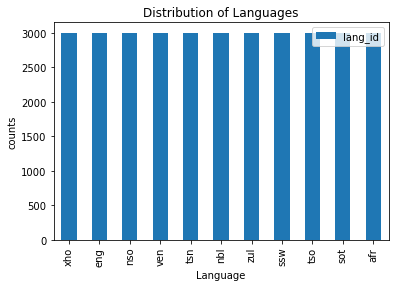

In [130]:
#Lets take a look at our sentiments

pd.value_counts(train['lang_id']).plot.bar()
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('counts')
plt.legend()
plt.show()

#### Observation:  All languages have same count from the graph above

In [131]:
train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [132]:
# adding a column to represent the length of the tweet

train['len'] = train['text'].str.len()
test['len'] = test['text'].str.len()

train.head(10)

,lang_id,text,len
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,eng,the province of kwazulu-natal department of tr...,264
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,214
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,299
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,257
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,288
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,212


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [63]:
# clean_train = []
# # iterating through all the text
# for t in train.text:
#     # removing the symbols and numbers
#     t = re.sub(r'[!@#$()<>/\,"%^*?:;~`0-9]', ' ', t)
#     t = re.sub(r'[[]]', ' ', t)
#     # converting the text to lower case
#     t = t.lower()
#     # appending to data_list
#     clean_train.append(t)

In [133]:
#Punctuation removal:
print ('Cleaning punctuation... for Test and Train using the below function')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['clean'] = train['text'].apply(remove_punctuation_numbers)
test['clean'] = test['text'].apply(remove_punctuation_numbers)

Cleaning punctuation... for Test and Train using the below function


In [134]:
# Make lower case
print ('Lowering case... Train')
train['clean'] = train['clean'].str.lower()

# Make lower case
print ('Lowering case... Test')
test['clean'] = test['clean'].str.lower()

Lowering case... Train
Lowering case... Test


In [64]:
# train['clean'] = clean_train

In [135]:
#Removed NonAscii

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

train['clean'] = train['clean'].apply(_removeNonAscii)
test['clean'] = test['clean'].apply(_removeNonAscii)

In [136]:
test.head(10)

,index,text,len,clean
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",58,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,109,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,42,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,60,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,29,winste op buitelandse valuta
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...",243,ke feela dilense te hlakilego ta pono e tee go...
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,68,fn am final gems birthing optionszulutxtfn
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,104,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,245,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,"So, on occasion, are statistics misused.",40,so on occasion are statistics misused


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [137]:
le = LabelEncoder()
y = le.fit_transform(train['lang_id'])

In [138]:
# creating bag of words

vectorizer = TfidfVectorizer(ngram_range = (1,2), min_df = 2)
# fit the model for training data
X = vectorizer.fit_transform(train.clean)


print(X.shape)
print(y.shape)

(33000, 205877)
(33000,)


In [111]:
# creating bag of words for test data
x_test = vectorizer.transform(test.clean)

print(x_test.shape)

(5682, 713057)


In [75]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
# transformer = TfidfTransformer()
# X_data = transformer.fit_transform(X).toarray()
# x_test = transformer.fit_transform(x_test).toarray()
# print(X_data.shape)
# print(x_test.shape)
#X_train_data[0]

(15819, 3000)
(10546, 3000)


In [112]:
#Split the X data into train and valid 

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)

#### Model 1: Random Forest

In [77]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_valid)

print("Training Accuracy :", rf.score(x_train, y_train))
print("Validation Accuracy :", rf.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, rf_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, rf_pred)
print(cm)
print("\n\nClassification Report:\n\n", classification_report(y_valid, rf_pred))

Training Accuracy : 1.0
Validation Accuracy : 0.9851515151515151
F1 score : 0.9852835985039397
[[582   0   0   0   0   0   0   0   0   0   1]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  1   1 553   0   0   0   0   0   0   4  24]
 [  0   0   0 623   1   0   1   0   0   0   0]
 [  0   0   0   1 617   0   0   0   0   0   0]
 [  0   2   0   0   0 556   0   0   0   0  26]
 [  1   0   0   0   2   0 595   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   2   0   0   0   0   0   0 593  14]
 [  0   1   7   0   0   0   0   0   0   9 573]]


### Model 2: Naive Bayes Multinomial Classifier

In [113]:
m_nb = MultinomialNB()
m_nb.fit(x_train,y_train)

nb_predict = m_nb.predict(x_valid)

print("Training Accuracy :", m_nb.score(x_train, y_train))
print("Validation Accuracy :", m_nb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, nb_predict, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, nb_predict)
print(cm)
print("\n\nClassification Report:\n\n", classification_report(y_valid, nb_predict))

Training Accuracy : 0.9997727272727273
Validation Accuracy : 0.998030303030303
F1 score : 0.9980299206160371
[[583   0   0   0   0   0   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 582   0   0   0   0   0   0   0   1]
 [  0   0   0 624   1   0   0   0   0   0   0]
 [  0   0   0   0 618   0   0   0   0   0   0]
 [  0   1   0   0   0 582   0   0   0   0   1]
 [  1   0   0   0   0   0 597   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   1   0   0   0   0   0   0 607   1]
 [  0   1   4   0   0   0   0   0   0   1 584]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       615
           2       0.99      1.00      0.99       583
           3       1.00      1.00      1.00       625
           4       1.00      1.00      1.00       618
           5       1.

### Model 4: Logistic Regression

In [114]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

lgr_pred = lgr.predict(x_valid)

print("Training Accuracy :", lgr.score(x_train, y_train))
print("Validation Accuracy :", lgr.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, lgr_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, lgr_pred)
print(cm)
print("\n\nClassification Report:\n\n", classification_report(y_valid, lgr_pred))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy : 0.9995833333333334
Validation Accuracy : 0.9934848484848485
f1 score : 0.9934903349969155
[[576   1   0   0   0   3   0   0   0   3   0]
 [  0 613   0   0   0   1   0   0   0   1   0]
 [  0   0 574   0   0   0   0   0   0   3   6]
 [  0   0   0 620   0   0   2   0   0   3   0]
 [  0   0   1   0 617   0   0   0   0   0   0]
 [  0   0   0   0   0 582   0   0   0   0   2]
 [  0   0   0   0   0   0 597   0   0   1   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   1   0   0   0   0   0   0 607   1]
 [  0   1   5   0   0   2   0   0   0   6 576]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       583
           1       1.00      1.00      1.00       615
           2       0.99      0.98      0.99       583
           3       1.00      0.99      1.00       625
           4       1.00      1.00      1.00       618
           5       0

### Model 7: XGBoost

In [80]:


xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_valid)

print("Training Accuracy :", xgb.score(x_train, y_train))
print("Validation Accuracy :", xgb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, xgb_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, xgb_pred)
print(cm)
print("\n\nClassification Report:\n\n", classification_report(y_valid, xgb_pred))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9961742424242425
Validation Accuracy : 0.978030303030303
f1 score : 0.9780468448057643
[[579   0   0   0   0   4   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  1   0 558   0   0   6   0   0   0   5  13]
 [  0   0   1 616   0   0   8   0   0   0   0]
 [  0   0   3   0 615   0   0   0   0   0   0]
 [  0   1   2   0   0 560   0   0   0   3  18]
 [  1   0   0   3   4   0 589   0   1   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   8   0   0   8   0   0   0 581  12]
 [  0   2  18   0   0  13   0   0   0  10 547]]


Classification Report:

               precision    recall  

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [116]:
#rf1 = rf.predict(x_test)
lg1_pred = lgr.predict(x_test)
m_nb_pred = m_nb.predict(x_test)
#gb = xgb.predict(x_test)

In [117]:
#rf1 = le.inverse_transform(rf1)
lg1_pred = le.inverse_transform(lg1_pred)
m_nb_pred = le.inverse_transform(m_nb_pred)
#gb = le.inverse_transform(gb)

In [120]:
test['lang_id'] = m_nb_pred

In [121]:
test[['index','lang_id']].to_csv('test_nbxx.csv', index=False)

In [125]:
ggb = GaussianNB()
ggb.fit(X.toarray(),y)
ggb_pred = ggb.predict(x_test)
# ggb_pred = le.inverse_transform(ggb_pred)

MemoryError: Unable to allocate 175. GiB for an array with shape (33000, 713057) and data type float64

In [ ]:
test['lang_id'] = ggb_pred

In [ ]:
test[['index','lang_id']].to_csv('test_ggb77.csv', index=False)

In [90]:
nb = MultinomialNB()
nb.fit(X,y)
nb_1 = nb.predict(x_test)
nb_1 = le.inverse_transform(nb_1)

In [91]:
test['lang_id'] = nb_1

In [92]:
test[['index','lang_id']].to_csv('test_mn77.csv', index=False)

In [34]:
lg = LogisticRegression(C=10)
lg.fit(X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10)

In [35]:
lg_p = lg.predict(x_test)
test['lang_id'] = nb_1
test[['index','lang_id']].to_csv('test_lg22.csv', index=False)

In [93]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator = nb)
bg.fit(X,y)
bg_p = bg.predict(x_test)
bg_p = le.inverse_transform(bg_p)

In [94]:
test['lang_id'] = bg_p
test[['index','lang_id']].to_csv('test_bg11.csv', index=False)

In [38]:
sub_file2 = samplesubmission.copy()



In [66]:
sub_file3 = samplesubmission.copy()

sub_file3.sentiment = xgb3
sub_file3.to_csv("gb2_test.csv", index = False)

In [62]:
sub_file4 = samplesubmission.copy()

sub_file4.sentiment = m_nb_pred
sub_file4.to_csv("nb_test.csv", index = False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Multinomial Naive Bayes outperformed all other models and so is the best performing model for this experiment.

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.